In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
x_data = np.linspace(0.0,10.0, 10000000)

In [4]:
noise = np.random.randn(len(x_data))

In [19]:
noise

array([-0.97801879,  0.39560382,  1.00284894, ...,  1.49341063,
        1.26976451, -0.11087588])

y = mx + b

b = 5 

In [8]:
y_true = (0.5 * x_data ) + 5 + noise

In [10]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [11]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [13]:
y_df.head()

,Y
0,4.021981
1,5.395604
2,6.002850
3,5.531210
4,7.097296


In [14]:
#concatenate our data

my_data = pd.concat([x_df,y_df],axis=1)

In [15]:
my_data

,X Data,Y
0,0.000000,4.021981
1,0.000001,5.395604
2,0.000002,6.002850
3,0.000003,5.531210
4,0.000004,7.097296
5,0.000005,3.171184
6,0.000006,2.959732
7,0.000007,4.950232
8,0.000008,5.408899
9,0.000009,5.741616


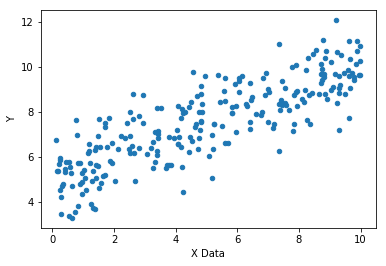

In [30]:
my_data.sample(n=250).plot(kind='scatter',x='X Data', y = 'Y')

# We can see a linear trend in this plot

# Now we will use Tensorflow to fit it

## Problem of massive datasets - using batches


In [20]:
batch_size = 8

In [21]:
np.random.randn(2)

array([ 0.28233214, -2.04259275])

In [22]:
#start some random values with
m = tf.Variable(0.28233214)
b = tf.Variable(2.04259275)

In [23]:
xph = tf.placeholder(tf.float32,[batch_size])

In [24]:
yph = tf.placeholder(tf.float32,[batch_size])

In [25]:
y_model = m*xph + b

In [26]:
#loss function - or error function
#MSE

error = tf.reduce_sum(tf.square(yph - y_model))

In [28]:
#Optimizer function

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

#tell the optimizer what to minimize
train = optimizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    
    sess.run(init)
    
    #run a 1000 batches
    
    batches = 1000
    
    for i in range(batches):
        
        
        # get 8 (number of the batch_size) random index from our dataset to use as our example to train
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        #print('rand indt {}'.format(rand_ind))
        
        #use the random index to fetch the data from the dataset
        feed = {xph:x_data[rand_ind], yph: y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])
            
    

In [35]:
#our hyperparameter M trained
model_m

0.52779913

In [36]:
#hyperparameter b trained
model_b

4.9250078

## Now we can use our trained parameters into our y = mx + b function and check our results with our x_data dataset

In [37]:
y_hat = x_data * model_m + model_b

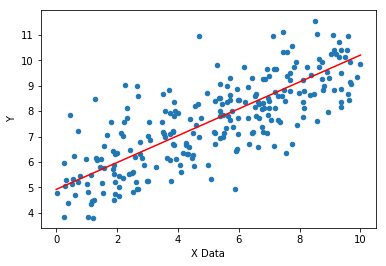

In [38]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

# TF Estimator


In [39]:
# for numeric values - put all your feature columns here for further estimation
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1])]

In [40]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_model_dir': '/tmp/tmpcw0gmwij', '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000}


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# splitting into train and test || train and eval

x_train, x_eval, y_train , y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [45]:
print (x_train.shape)

(7000000,)


In [46]:
x_eval.shape

(3000000,)

In [47]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,batch_size=8,num_epochs=None, shuffle=True)

In [48]:
# will use train_input_func for evaluate the test input
    train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,batch_size=8,num_epochs=1000, shuffle=False)

In [49]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval,batch_size=8,num_epochs=1000, shuffle=False)

In [50]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpcw0gmwij/model.ckpt.
INFO:tensorflow:loss = 467.81, step = 1
INFO:tensorflow:global_step/sec: 492.689
INFO:tensorflow:loss = 23.5339, step = 101 (0.207 sec)
INFO:tensorflow:global_step/sec: 515.433
INFO:tensorflow:loss = 21.5691, step = 201 (0.195 sec)
INFO:tensorflow:global_step/sec: 460.377
INFO:tensorflow:loss = 10.2765, step = 301 (0.214 sec)
INFO:tensorflow:global_step/sec: 510.545
INFO:tensorflow:loss = 19.4077, step = 401 (0.198 sec)
INFO:tensorflow:global_step/sec: 475.766
INFO:tensorflow:loss = 4.79017, step = 501 (0.208 sec)
INFO:tensorflow:global_step/sec: 519.085
INFO:tensorflow:loss = 25.1312, step = 601 (0.197 sec)
INFO:tensorflow:global_step/sec: 518.843
INFO:tensorflow:loss = 4.10369, step = 701 (0.190 sec)
INFO:tensorflow:global_step/sec: 491.988
INFO:tensorflow:loss = 7.95198, step = 801 (0.206 sec)
INFO:tensorflow:global_step/sec: 526.524
INFO:tensorflow:loss = 6.48646, 

In [51]:
train_metics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-10-23-11:46:24
INFO:tensorflow:Restoring parameters from /tmp/tmpcw0gmwij/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [52]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2017-10-23-11:47:09
INFO:tensorflow:Restoring parameters from /tmp/tmpcw0gmwij/model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

In [53]:
print('Training Data Metrics')
print(train_metics)

Training Data Metrics
{'global_step': 1000, 'loss': 8.9504948, 'average_loss': 1.1188118}


In [54]:
print("Eval Metrics")
print(eval_metrics)

Eval Metrics
{'global_step': 1000, 'loss': 8.7861462, 'average_loss': 1.0982683}


In [55]:
brand_new_data = np.linspace(0,10,10)

In [57]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [59]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmpcw0gmwij/model.ckpt-1000


[{'predictions': array([ 4.34917688], dtype=float32)},
 {'predictions': array([ 5.00949001], dtype=float32)},
 {'predictions': array([ 5.66980267], dtype=float32)},
 {'predictions': array([ 6.33011532], dtype=float32)},
 {'predictions': array([ 6.99042845], dtype=float32)},
 {'predictions': array([ 7.65074062], dtype=float32)},
 {'predictions': array([ 8.31105423], dtype=float32)},
 {'predictions': array([ 8.97136688], dtype=float32)},
 {'predictions': array([ 9.63167953], dtype=float32)},
 {'predictions': array([ 10.29199219], dtype=float32)}]

In [60]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    
    predictions.append(pred['predictions'])
    

INFO:tensorflow:Restoring parameters from /tmp/tmpcw0gmwij/model.ckpt-1000


In [61]:
predictions

[array([ 4.34917688], dtype=float32),
 array([ 5.00949001], dtype=float32),
 array([ 5.66980267], dtype=float32),
 array([ 6.33011532], dtype=float32),
 array([ 6.99042845], dtype=float32),
 array([ 7.65074062], dtype=float32),
 array([ 8.31105423], dtype=float32),
 array([ 8.97136688], dtype=float32),
 array([ 9.63167953], dtype=float32),
 array([ 10.29199219], dtype=float32)]

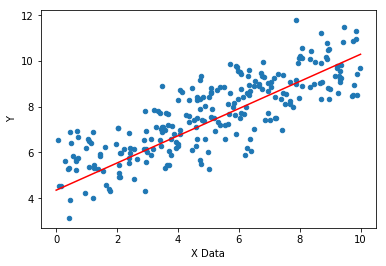

In [65]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')